In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

In [30]:
theta_0 = np.pi/4
theta_l = []
xl_l = []
xr_l = []
zl_l = []
zr_l = []
z_l = 1
z_r = 0
for i in range(10000):
    theta = theta_0+0.1*random.randn()
    if random.rand()<0.01:
        z_l = 1-z_l
    if random.rand()<0.01:
        z_r = 1-z_r
    xl = random.vonmises(theta,20*z_l)
    xr = random.vonmises(theta,z_r)
    theta_l.append(theta)
    xl_l.append(xl)
    xr_l.append(xr)
    zl_l.append(z_l)
    zr_l.append(z_r)

theta_l = np.array(theta_l)
xl_l = np.array(xl_l)
xr_l = np.array(xr_l)
zr_l = np.array(zr_l)
zl_l = np.array(zl_l)

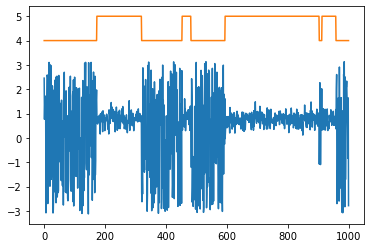

In [31]:
plt.plot(xl_l[1000:2000])
plt.plot(zl_l[1000:2000]+4)

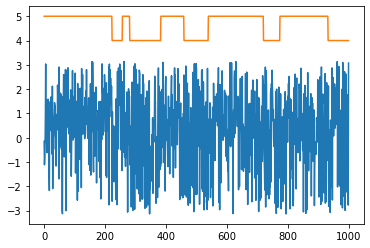

In [32]:
plt.plot(xr_l[1000:2000])
plt.plot(zr_l[1000:2000]+4)

In [280]:
def plot_dis(var_l):
    alpha_2d = np.zeros((200,200))
    l = np.arange(-0.5,1.5,0.01)
    alpha_l = np.array([0,0.8])
    alpha_r = np.array([0.8,0])
    var_r = 0.04
    for i in range(len(l)):
        for j in range(len(l)):
            alpha_ij = np.array([l[i],l[j]])
            p00 = np.exp(-0.5/var_l*np.linalg.norm(alpha_l)**2-0.5/var_r*np.linalg.norm(alpha_r)**2)*np.exp(-np.sum(np.abs(alpha_ij)))
            p01 = np.exp(-0.5/var_l*np.linalg.norm(alpha_l)**2-0.5/var_r*np.linalg.norm(alpha_ij-alpha_r)**2)*np.exp(-np.sum(np.abs(alpha_ij)))
            p10 = np.exp(-0.5/var_l*np.linalg.norm(alpha_ij-alpha_l)**2-0.5/var_r*np.linalg.norm(alpha_r)**2)*np.exp(-np.sum(np.abs(alpha_ij)))
            p11 = np.exp(-0.5/var_l*np.linalg.norm(alpha_ij-alpha_l)**2-0.5/var_r*np.linalg.norm(alpha_ij-alpha_r)**2)*np.exp(-np.sum(np.abs(alpha_ij)))
            alpha_2d[i,j] = p10+p01+p00+p11
        
    plt.imshow(np.flip(alpha_2d,axis=0)*10000/np.sum(alpha_2d),extent = [-0.5,1.5,-0.5,1.5])
    plt.xlabel('alpha_2')
    plt.ylabel('alpha_1')
    plt.colorbar()

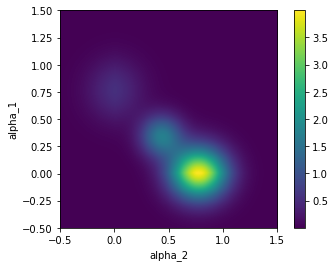

In [283]:
plot_dis(0.032)

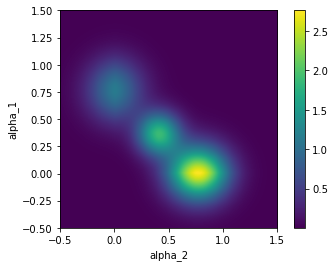

In [284]:
plot_dis(0.036)

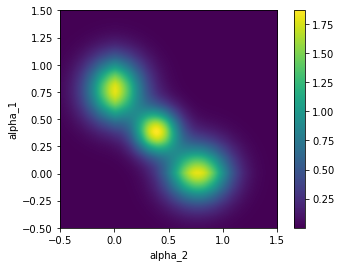

In [285]:
plot_dis(0.04)

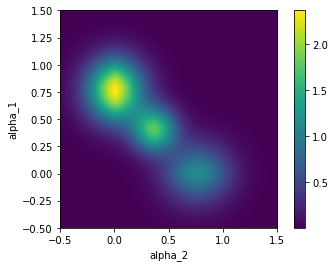

In [286]:
plot_dis(0.044)

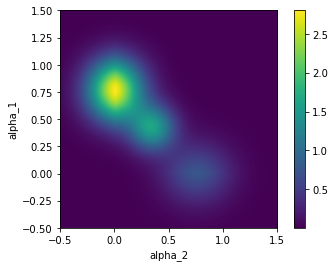

In [287]:
plot_dis(0.048)

In [137]:
np.linalg.norm(np.array([0.5,0.5]))

0.7071067811865476

In [251]:
np.exp(-0.64*0.5/0.032)

4.5399929762484854e-05

In [253]:
np.exp(-0.64*0.5/0.048)/np.exp(-0.64*0.5/0.032)

28.03162489452612